In [1]:
import numpy as np
import scipy.optimize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Only works in a separate cell
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
def get_data(csv_type='confirmed'):
    # Pull data from Johns Hopkins https://github.com/CSSEGISandData/COVID-19
    base_url= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
    url = base_url+csv_type+"_global.csv"
    df = pd.read_csv(url)
    del df['Lat']
    del df['Long']
    return df

In [4]:
confirmed = get_data()
deaths = get_data(csv_type='deaths')

In [5]:
def logistic(t, L, t0, k):
    return L/(1+np.exp(-k*(t-t0)))

def fit_logistic(t, n):
    sigma = np.sqrt(n)
    popt, pcov = scipy.optimize.curve_fit(logistic, xdata=t, ydata=n, sigma=sigma, 
                                          p0=[10000., 25., 0.5],absolute_sigma=True)
    return (popt, pcov)

def print_fit(popt, pcov):
#    print(popt)
    print(popt[0], np.sqrt(pcov[0,0]))
    print(popt[1], np.sqrt(pcov[1,1]))
    print(popt[2], np.sqrt(pcov[2,2]))
    
#    print(" Max: {:7d}+/-{:7d}".format(int(popt[0]),int(np.sqrt(pcov[0,0])))+
#          " Delay: {:2d}+/-{:2d}".format(int(popt[1]),int(np.sqrt(pcov[1,1])))+
#          " Slope: {:5.2f}+/-{:5.2f}".format(popt[2]),np.sqrt(pcov[2,2]))

In [6]:
def plot_df(df, start=10, 
            countries=['Italy','Spain','Germany','France',
                        'US','United Kingdom','Canada','Korea, South','China']):

    lastdate = df.columns[-1]

    for country in countries:
        df=df.append(df[df['Country/Region']==country][:].sum(axis=0), ignore_index=True)
        last = df.tail(1).index[0]
        df.loc[last,'Province/State']=''
        df.loc[last,'Country/Region']=country
        if str(start) == start:
            pass
        else:
            n=0
            ndates = len(df.columns[2:])
            for date in df.columns[2:]:
                #print(country, date, df.loc[last, date] )
                if df.loc[last, date] > start:
                    startidx = n
                    break
                n+=1
            x = np.arange(ndates-n)
            base_line, = plt.semilogy(x, df.iloc[last][n+2:], alpha=0.5)
            plt.plot([ndates-n-1],[df.iloc[last][-1]],'o', color=base_line.get_color())
            try:
                (popt, pcov) = fit_logistic(x.astype(float), df.iloc[last][n+2:].values.astype(float))
                x = np.arange(50)
                print("{:15s}".format(country),end="")
                print_fit(popt, pcov)
                plt.plot(x, logistic(x, popt[0], popt[1], popt[2]),':', color=base_line.get_color())
            except:
                pass

            plt.annotate(country, ((ndates-n-1+0.2),(df.iloc[last][-1])*1.10), 
                         xycoords='data', color=base_line.get_color(),
                         clip_on=True)
    
#    left, right = plt.xlim()
#    for rate in [1.33,1.25,1.20,1.15,1.10,1.05]:
#        plt.semilogy([left, right],[start,start*(rate**(right-left))],
#                     label=str('{:2d}'.format(int(round((rate-1)*100.,0))))+'% per day',ls=":",c='k',alpha=0.2)
    plt.legend(loc='upper left')

Italy          128163.65599491708 241.74707524419588
28.79225618557589 0.026205625733019867
0.1976794228964047 0.0003315639368999044
Spain          137717.3304046669 357.74293382837226
25.278859376935138 0.02628237253890293
0.24849076587733554 0.0004639068082569177
Germany        104491.25851959373 317.9629399311626
26.078708707406236 0.03208958513575056
0.23750778906556239 0.0005171132278548686
France         107109.10472578452 681.4271397997996
29.91871377828247 0.06498518112050423
0.1952244353667135 0.0004964003686040002
US             372680.6587050603 982.2244092999824
27.580564893796865 0.020522539776450584
0.2847071882231828 0.0003933878066957302
United Kingdom 70321.19484398163 867.9502913524342
28.249975591650852 0.10334038412627009
0.2195639975587064 0.0008642751959758734
Canada         18017.757148084576 283.21310031962366
20.216228532810497 0.13126636541021586
0.2521702015932875 0.0019163966301366958
Korea, South   8967.457189503777 19.688652684313364
11.516883565224035 0.0

No handles with labels found to put in legend.


China          80818.86893512562 43.10086939482576
17.709996055577427 0.01381112801121295
0.2423807325487284 0.00042555342133302024


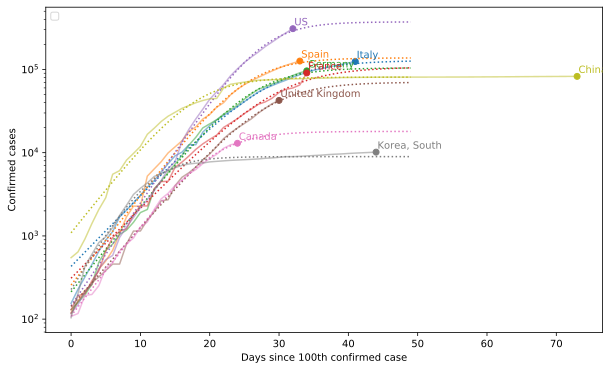

In [7]:
plot_df(confirmed, start=100)
plt.xlabel('Days since 100th confirmed case')
plt.ylabel('Confirmed cases');

Italy          15951.876831737789 99.00590000681075
28.08428634839286 0.07384532280342197
0.2215637122200561 0.0010868541768332795
Spain          13106.603439547007 121.64632352273443
20.49127526623043 0.08040864075168755
0.2917104097952234 0.0019928812313752043
Germany        2436.6031261489093 190.907947267413
18.693121454762974 0.531294019922424
0.2736689510068749 0.0072000813424442705
France         15744.275854149788 764.1330133967933
28.755106652783297 0.33357661662226307
0.23469304398333218 0.002317309679191769
US             23265.301644475298 1523.434072619014
33.15665970309874 0.3744482980147607
0.26191820763694107 0.0026430554392295924
United Kingdom 19627.807910136024 3550.1617623149746
26.214922307904526 0.9839339698251098
0.24271193876562067 0.003823366034660392
Korea, South   208.45566051983434 16.22623396549305
23.509762089448877 1.712233056701799
0.10968324229276574 0.007415730506247556


No handles with labels found to put in legend.


China          3198.98020031578 9.829088610362678
23.84576041746605 0.08712372079621672
0.1810647418996197 0.0014227749197212704


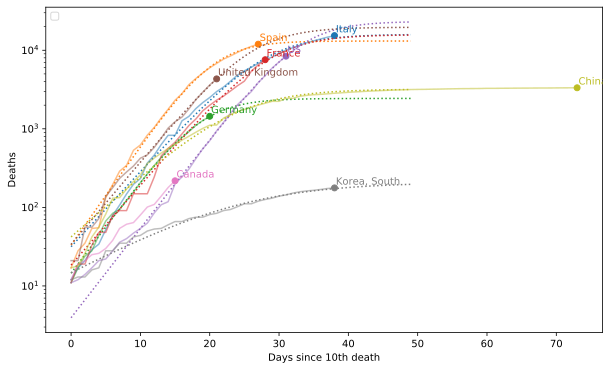

In [8]:
plot_df(deaths, start=10)
plt.xlabel('Days since 10th death')
plt.ylabel('Deaths');